In [2]:
import numpy as np
import gurobipy as gp

## 2. Factory & Warehouse in Austin & Dallas

A company is thinking about building new facilities in Austin and Dallas. Here is the relevant data.
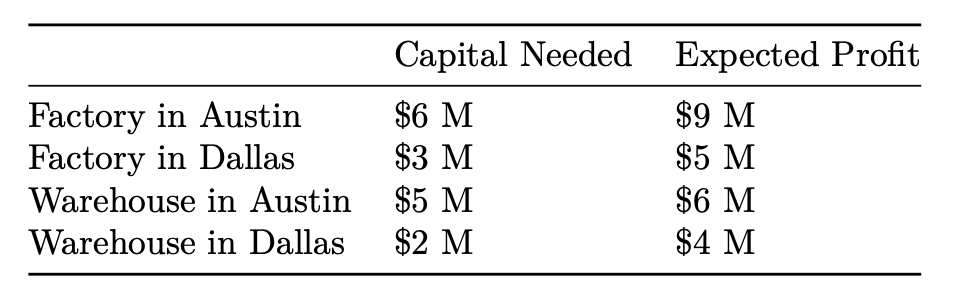

Total capital available for investment is $11M. You can’t build more than one factory (warehouse) in one place. At most one warehouse must be built in Austin or Dallas. At least one factory must be built in Austin or Dallas. Find the optimal investment strategy.

In [3]:
q1Mod = gp.Model()
q1ModX = q1Mod.addMVar(4, vtype = 'B')
q1Mod.setObjective(9*q1ModX[0] + 5*q1ModX[1] +6*q1ModX[2] + 4*q1ModX[3] ,sense=gp.GRB.MAXIMIZE)
q1Mod_con1 = q1Mod.addConstr(6*q1ModX[0] + 3*q1ModX[1] +5*q1ModX[2] + 2*q1ModX[3]<=11)
q1Mod_con2 = q1Mod.addConstr(q1ModX[0]+q1ModX[2]<=1)
q1Mod_con3 = q1Mod.addConstr(q1ModX[1]+q1ModX[3]<=1)
q1Mod_con4 = q1Mod.addConstr(q1ModX[2]+q1ModX[3]<=1)
q1Mod_con5 = q1Mod.addConstr(q1ModX[0]+q1ModX[1]>=1)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-20


In [4]:
q1Mod.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 5 rows, 4 columns and 12 nonzeros
Model fingerprint: 0x2ff3eed0
Variable types: 0 continuous, 4 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [4e+00, 9e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 14.0000000
Presolve removed 5 rows and 4 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 14 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.400000000000e+01, best bound 1.400000000000e+01, gap 0.0000%


In [5]:
q1Mod.objVal

14.0

Is building the Factory in Dallas part of the optimal investment strategy?

In [6]:
q1Mod.x

[1.0, 1.0, 0.0, 0.0]

#### Yes, Factory in Dallas is part of the optimal investment strategy

## 3. Western Airlines

Western Airlines wants to design a hub system in the United States. Each hub is used for connecting flights to and from cities within 1000 miles of the hub. Western runs flights among the following cities: Atlanta (ATL), Boston (BOS), Chicago (CHI), Denver (DEN), Houston (HOU), Los Angeles (LAX), New Orleans (NO), New York (NY), Pittsburgh (PIT), Salt Lake City (SLC), San Francisco (SF), and Seattle (SEA). The company wants to determine the smallest number of hubs it needs to cover all these cities, where a city is covered if it is within 1000 miles of at least one hub. The table below lists which cities are within 1000 miles of other cities. For example, if a hub was placed at Boston (BOS), it could cover the cities of Boston, New York, and Pittsburgh.

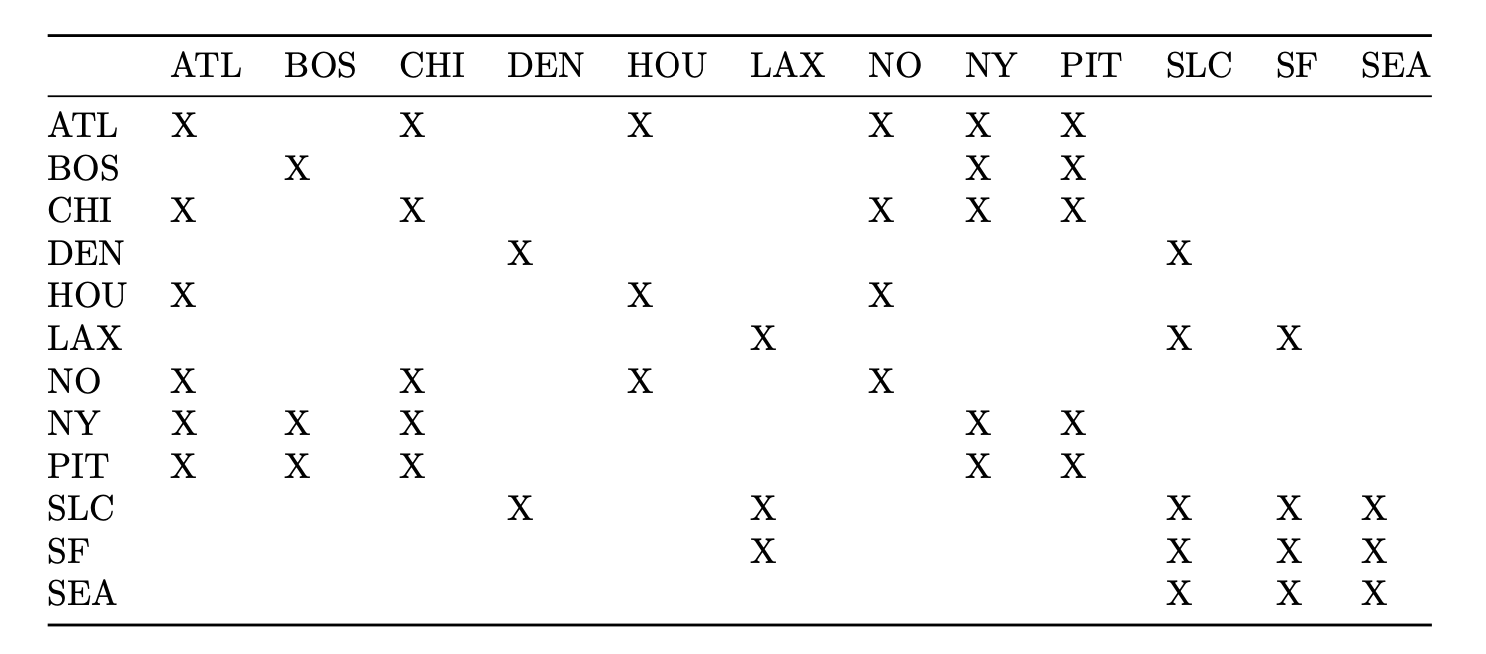

Formulate and solve this problem as a binary integer program.

In [7]:
q2Mod = gp.Model()
cities = ['ATL', 'BOS', 'CHI', 'DEN','HOU', 'LAX','NO','NY','PIT','SLC','SF','SEA']

A=[[1,0,1,0,1,0,1,1,1,0,0,0],
   [0,1,0,0,0,0,0,1,1,0,0,0],
   [1,0,1,0,0,0,1,1,1,0,0,0],
   [0,0,0,1,0,0,0,0,0,1,0,0],
   [1,0,0,0,1,0,1,0,0,0,0,0],
   [0,0,0,0,0,1,0,0,0,1,1,0],
   [1,0,1,0,1,0,1,0,0,0,0,0],
   [1,1,1,0,0,0,0,1,1,0,0,0],
   [1,1,1,0,0,0,0,1,1,0,0,0],
   [0,0,0,1,0,1,0,0,0,1,1,1],
   [0,0,0,0,0,1,0,0,0,1,1,1],
   [0,0,0,0,0,0,0,0,0,1,1,1]]

q2ModX = q2Mod.addMVar(len(cities), vtype = 'B')

q2ModY = q2Mod.addMVar((len(cities), len(cities)), vtype = 'B')

q2Mod.setObjective(q2ModX.sum(), sense = gp.GRB.MINIMIZE)

for j in range(len(cities)):
    q2Mod.addConstr(gp.quicksum(q2ModY[i, j] for i in range(len(cities))) >= 1)

for i in range(len(cities)):
    for j in range(len(cities)):
        q2Mod.addConstr(q2ModY[i,j] <= q2ModX[i] * A[i][j])

q2Mod.optimize()


Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 156 rows, 156 columns and 336 nonzeros
Model fingerprint: 0xcde860ff
Variable types: 0 continuous, 156 integer (156 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 9.0000000
Presolve removed 156 rows and 156 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 3 9 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%


In [8]:
q2Mod.objVal

3.0

Is SLC a hub in the optimal solution?

In [9]:
q2ModX[cities.index('SLC')].X

array(1.)

#### Yes, SLC is a hub in the optimal solution

## 4. Paper mill - Cutting stock

A paper mill cuts the rolls of paper into different widths to satisfy customers’ demand. In this problem, assume the original rolls of paper are 120 inches wide. The table below shows the orders received by the paper mill.

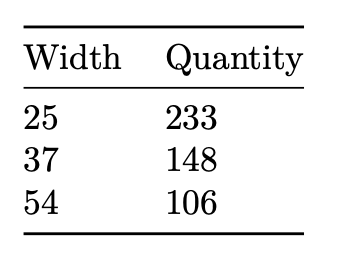

A 120 inch roll can be cut in many ways. For example, we can cut four 25-inch rolls while wasting the remaining 20 inches; we can also cut one 25-inch, one 37-inch, and one 54-inch. In the second case, only 4 inches is wasted.

Develop and solve an integer program to minimize the waste from cutting to satisfy all orders.  For more information, you can check out the cutting stock problem on wikipedia: https://en.wikipedia.org/wiki/Cutting_stock_problem to an external site.

 

How many rolls get cut into the pattern such that there are 3 cuts of 25 inches, and 1 cut of 37 inches (this pattern results in 8" waste)?

In [12]:
q3Mod = gp.Model()
A = [[3,1,0]]

q3ModX = q3Mod.addVars(len(A), vtype= 'I')
c = [8] 

q3Mod.setObjective(gp.quicksum(c[i] * q3ModX[i] for i in range(len(A))))

q3Mod_con1 = q3Mod.addConstr(gp.quicksum(A[i][0] * q3ModX[i] for i in range(len(A))) >= 233) 
q3Mod_con2 = q3Mod.addConstr(gp.quicksum(A[i][1] * q3ModX[i] for i in range(len(A))) >= 148)  
#q3Mod.addConstr(gp.quicksum(A[i][2] * q3ModX[i] for i in range(len(patterns))) >= 106)

q3Mod.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 1 columns and 2 nonzeros
Model fingerprint: 0x6fb743d1
Variable types: 0 continuous, 1 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [8e+00, 8e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 2e+02]
Found heuristic solution: objective 1184.0000000
Presolve removed 2 rows and 1 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 1184 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.184000000000e+03, best bound 1.184000000000e+03, gap 0.0000%


In [13]:
q3Mod.objVal

1184.0

In [14]:
q3Mod.x

[148.0]

## 5. Day - Off Scheduling

The days-off scheduling problem must be solved routinely by businesses that operate 6 or 7 days a week. Examples include hospitals, airlines, municipal transportation companies, and the postal service. The most common example is the (5,7)-cyclic staffing problem. The objective of it is to minimize the cost of assigning workers to a 7-day cyclic schedule so that

1) Sufficient workers are available every day.

2) Each person works 5 consecutive days and is idle to the remaining 2 days.

Here is the table showing the cost of having an employee for each day and the number of employees required for each day.

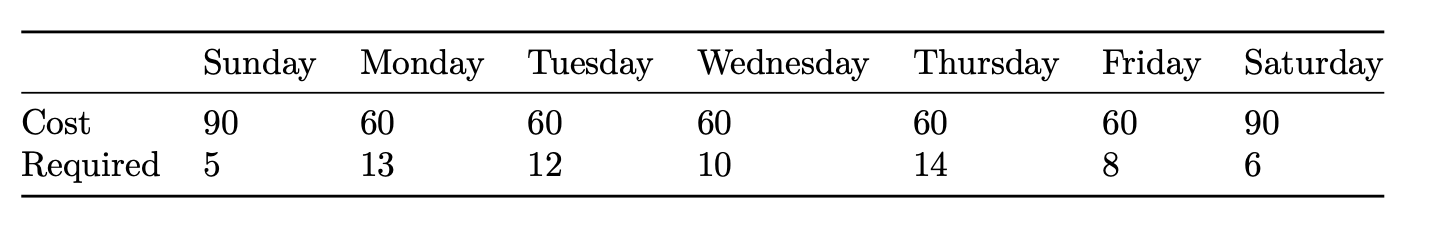

For example, the pattern that one works from Sunday to Thursday costs 90 + 60 × 4 = 330.

Formulate and solve an integer programming problem to represent this problem.

How many employees work Monday-Friday?

In [15]:
q4Mod = gp.Model()

c = [90,60,60,60,60,60,90]
r = [5,13,12,10,14,8,6]

q4ModX = q4Mod.addVars(len(c), vtype= 'I')

q4Mod.setObjective(gp.quicksum(c[i] * q4ModX[i] for i in range(len(c))))

for i in range(len(c)):
    q4Mod.addConstr(gp.quicksum(q4ModX[(i-j) % 7] for j in range(5)) >= r[i])

q4Mod.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 7 columns and 35 nonzeros
Model fingerprint: 0x544d1b7d
Variable types: 0 continuous, 7 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+01, 9e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 1e+01]
Found heuristic solution: objective 1920.0000000
Presolve time: 0.00s
Presolved: 7 rows, 7 columns, 35 nonzeros
Variable types: 0 continuous, 7 integer (0 binary)
Found heuristic solution: objective 1890.0000000

Root relaxation: objective 9.300000e+02, 5 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  930.00000    0    3 1890.00000  930.00000  50.8%     -    0s
H    0     0     

In [16]:
q4Mod.objVal

930.0

In [17]:
q4Mod.x

[1.0, 8.0, 2.0, 0.0, 3.0, 1.0, -0.0]